#Understanding the Objective
###The goal is to predict the salary of data related positions based on location, company review and job title


#Import dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df.csv to df.csv



#Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pickle

#Read the data

In [ ]:
df = pd.read_csv("df.csv")

# Data Understanding

In [ ]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...
5887,Manufacturing Data Analyst Engineer,$42K - $76K (Glassdoor est.),3.6,Hose Master\n3.6,"Euclid, OH",201 to 500 Employees,1982,Company - Private,Electrical & Electronic Manufacturing,Manufacturing,Unknown / Non-Applicable
5888,Data Scientist,-1,4.9,Bluetree Network\n4.9,"Madison, WI",-1,-1,-1,-1,-1,-1
5889,Supply Chain Consultant - Data Scientist,-1,4.0,"Kimberly-Clark Corporation, LLC\n4.0","Neenah, WI",10000+ Employees,1872,Company - Public,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD)
5890,Data Science Engineer,-1,4.0,AE Business Solutions\n4.0,"Madison, WI",51 to 200 Employees,1949,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD)


A few quick things come to mind looking at the above data:

1. Job titles can be categorized based on the words they contain such as "director", "data analyst", ...
2. Minimum and maximum salaries can be extracted from the salary estimate column and then averaged to create a new average salary column which will be our response variable
3. Company names should not matter much
4. The state where each position is located can be extracted from the location column
5. Because there are too many unknowns in the Revenue column, we will not use that column

#Assess data

In this section, we will check the raw data and get an understanding of what kind of data we are dealing with.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


#Clean Data


*  Created minimum and maximum salary columns for the positions and parsed the
corresponding values out of the raw data

*   Created average salary column


* Extracted the state where each position is located. Created a state column

* Title column was created to show the different categories for the posted roles such as data engineer, deep learning, analyst, ...







In [ ]:
 # Remove Per Hour salary
df = df[~df['Salary Estimate'].str.contains("Per Hour")]

In [ ]:
# Remove instances without salary estimates
df = df[df['Salary Estimate']!= "-1"]

In [ ]:
def k_doller_remover_spliter(a):
  a = a.replace("K", " ")
  a = a.replace("$", " ")
  a = a.split()
  return a

In [ ]:
df['Salary Estimate'] = df['Salary Estimate'].apply(k_doller_remover_spliter)

In [ ]:
def min_finder(a):
  a = a[0]
  return a

In [ ]:
df['Min_salary'] = df["Salary Estimate"].apply(min_finder)

In [ ]:
def max_finder(a):
  a = a[2]
  return a

In [ ]:
df["Max_salary"] = df['Salary Estimate'].apply(max_finder)

In [ ]:
df.shape

(5500, 13)

In [ ]:
df['Max_salary'] = df['Max_salary'].astype(int)
df['Min_salary'] = df['Min_salary'].astype(int)

In [ ]:
df["Average_salary"] = (df['Max_salary'] + df['Min_salary'])/2

In [ ]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_salary,Max_salary,Average_salary
0,Senior Data Scientist,"[111, -, 181, (Glassdoor, est.)]",3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,111,181,146.0
1,"Data Scientist, Product Analytics","[111, -, 181, (Glassdoor, est.)]",4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,111,181,146.0
2,Data Science Manager,"[111, -, 181, (Glassdoor, est.)]",-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,111,181,146.0
3,Data Analyst,"[111, -, 181, (Glassdoor, est.)]",3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,111,181,146.0
4,"Director, Data Science","[111, -, 181, (Glassdoor, est.)]",3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,111,181,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,Information Scientist,"[38, -, 64, (Glassdoor, est.)]",3.2,CAS\n3.2,"Columbus, OH",1001 to 5000 Employees,1907,Subsidiary or Business Segment,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD),38,64,51.0
5882,Supervisory Research Health Scientist,"[47, -, 89, (Glassdoor, est.)]",4.2,Centers for Disease Control and Prevention\n4.2,"Cincinnati, OH",10000+ Employees,1946,Government,Federal Agencies,Government,Unknown / Non-Applicable,47,89,68.0
5883,Senior SAS Programmer (Scientist),"[66, -, 113, (Glassdoor, est.)]",4.0,Certara\n4.0,"Cincinnati, OH",501 to 1000 Employees,2008,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,66,113,89.5
5886,Senior Data Analyst - Product Analytics (open ...,"[67, -, 111, (Glassdoor, est.)]",4.0,New Relic\n4.0,"Cincinnati, OH",1001 to 5000 Employees,2008,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),67,111,89.0


In [ ]:
def state(a):
  a = a.split()
  a = a[-1]
  return (a)

In [ ]:
# State: what state is the job in
df["state"] = df['Location'].apply(state)

In [ ]:
df["state"].value_counts()

,count
state,
CA,1311
TX,1243
OH,408
IL,368
PA,324
NY,313
AZ,297
FL,261
MA,239


In [ ]:
df = df[df["state"] != "Kingdom"]

In [ ]:
df = df[df["Rating"] != -1.0]

In [ ]:
df.shape

(4891, 15)

In [ ]:
set(df['Job Title'])

{'Sr. IoT Data Scientist - AWS Professional Services',
 'Scientist, Histology',
 'Product Manager - Data Science',
 'Staff Machine Learning Engineer - Core Algorithms',
 'Senior Customer Data Analyst : 20',
 'Sr. Computational Biologist, Oncology Drug Discovery',
 'Data Engineer/Data Scientist with Healthcare Claims Experience',
 'Technical Data Consultant',
 'Data Scientist Sr. Associate - SALES SCIENCE',
 'Senior Data Analyst - Abbott Nutrition - Columbus, OH',
 'Research Scientist-Medicinal Chemistry',
 'Polymer Modified Asphalt Engineer/Scientist',
 'IT Data Analyst',
 'Data Scientist/Machine Learning Specialist',
 'Data Analytics Manager in Jacksonville, FL at One Call',
 'Card Data Analyst',
 'Business and Customer Data Analyst',
 'Senior Analytical Scientist',
 'Data Scientist - Market and Sales Analytics',
 'Staff Reliability Data Scientist',
 'Business Intelligence and Data Analyst',
 'Application Vulnerability Governance Lead Data Analyst',
 'SWRMC Assessments Junior Data Ana

In [ ]:
len(set(df['Job Title']))

2552

In [ ]:
df['Job Title'].value_counts()

,count
Job Title,
Data Scientist,530
Data Analyst,296
Data Engineer,267
Senior Data Scientist,117
Machine Learning Engineer,55
...,...
Data Scientist - Top Secret w/ SCI Eligibility,1
Business Intelligence Analyst I,1
Business Intelligence Analyst Senior (Chief Financial Office),1


In [ ]:
def title_organizer(x):
    x = x.lower()
    if ('data scientist' in x) or ('data science' in x) :
        return 'data scientist'
    elif 'data engineer' in x:
        return 'data engineer'
    elif 'deep learning' in x:
        return 'deep learning engineer'
    elif 'machine learning' in x:
        return 'machine learning engineer'
    elif 'director' in x:
        return 'director'
    elif 'manager' in x:
        return 'manager'
    elif 'analyst' in x:
        return 'analyst'
    elif 'researcher' in x:
        return 'researcher'
    else:
        return 'other'

In [ ]:
df['Job Title'] = df['Job Title'].apply(title_organizer)

In [ ]:
df['Job Title'].value_counts()

,count
Job Title,
data scientist,1793
analyst,1048
other,1009
data engineer,764
machine learning engineer,162
manager,67
researcher,30
director,15
deep learning engineer,3


In [ ]:
df.columns



Index(['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Min_salary', 'Max_salary', 'Average_salary', 'state'],
      dtype='object')

In [ ]:
df = df.drop(columns = ['Salary Estimate','Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Min_salary', 'Max_salary'])

In [ ]:
df

,Job Title,Rating,Average_salary,state
0,data scientist,3.5,146.0,NY
1,data scientist,4.5,146.0,NY
3,analyst,3.4,146.0,NJ
4,data scientist,3.4,146.0,NY
5,data scientist,2.9,146.0,NY
...,...,...,...,...
5881,other,3.2,51.0,OH
5882,other,4.2,68.0,OH
5883,other,4.0,89.5,OH
5886,analyst,4.0,89.0,OH


# Exploratory Data Analysis (EDA)

<ipython-input-33-56ed55d36b2b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Job Title" , data = df, palette = colors, edgecolor = "black",
<ipython-input-33-56ed55d36b2b>:10: UserWarning: The palette list has more values (12) than needed (9), which may not be intended.
  sns.countplot(x = "Job Title" , data = df, palette = colors, edgecolor = "black",
<ipython-input-33-56ed55d36b2b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "state", data = df, palette = colors, edgecolor = "black",
<ipython-input-33-56ed55d36b2b>:17: UserWarning: 
The palette list has fewer values (12) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x =

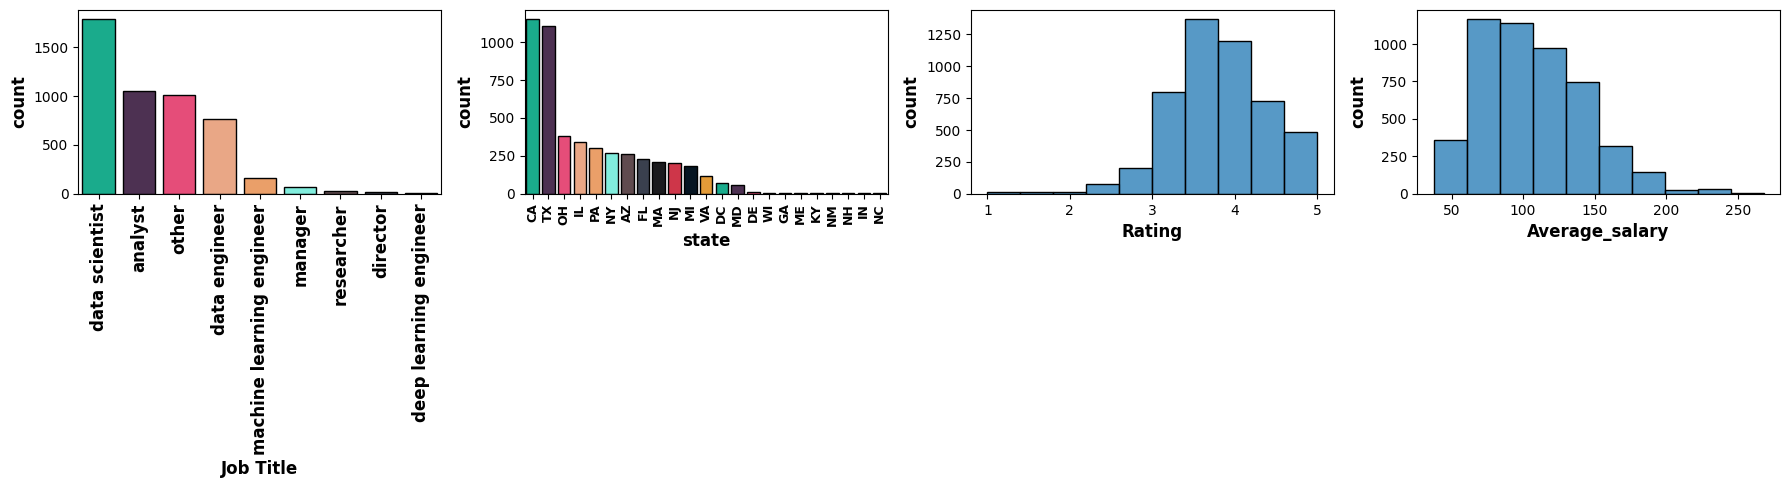

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['#02c39a', '#512b58', '#fe346e', '#faa275', '#ff9b54', '#6fffe9', '#63474d',
          '#373f51', '#1b1b1e', '#e71d36', '#011627', '#ff9f1c']

fig,ax = plt.subplots(nrows=1, ncols=4 , figsize = (18,5))

plt.subplot(1,4,1)
sns.countplot(x = "Job Title" , data = df, palette = colors, edgecolor = "black",
              order = df["Job Title"].value_counts().index, width = 0.8)
plt.xticks(rotation =90, fontsize = 12, fontweight = "bold")
plt.xlabel("Job Title",fontsize = 12, fontweight = "bold")
plt.ylabel("count",fontsize = 12, fontweight = "bold")

plt.subplot(1,4,2)
sns.countplot(x = "state", data = df, palette = colors, edgecolor = "black",
              order = df['state'].value_counts().index, width = 0.8)
plt.xticks(rotation =90, fontsize = 9, fontweight = "bold")
plt.xlabel("state",fontsize = 12, fontweight = "bold")
plt.ylabel("count",fontsize = 12, fontweight = "bold")

ax3 = plt.subplot(1,4,3)
sns.histplot(x = "Rating", data = df, bins = 10, ax = ax3)
plt.xlabel("Rating",fontsize = 12, fontweight = "bold")
plt.ylabel("count",fontsize = 12, fontweight = "bold")

ax4 = plt.subplot(1,4,4)
sns.histplot(x = "Average_salary", data = df, bins = 10, ax = ax4)
plt.xlabel("Average_salary",fontsize = 12, fontweight = "bold")
plt.ylabel("count",fontsize = 12, fontweight = "bold")

plt.tight_layout(h_pad= 5)
plt.show()


In [ ]:
df.describe()

,Rating,Average_salary
count,4891.000000,4891.000000
mean,3.817011,106.082192
std,0.577004,35.749097
min,1.000000,37.500000
25%,3.500000,77.500000
50%,3.800000,102.000000
75%,4.100000,130.000000
max,5.000000,268.000000


<Axes: xlabel='Rating'>

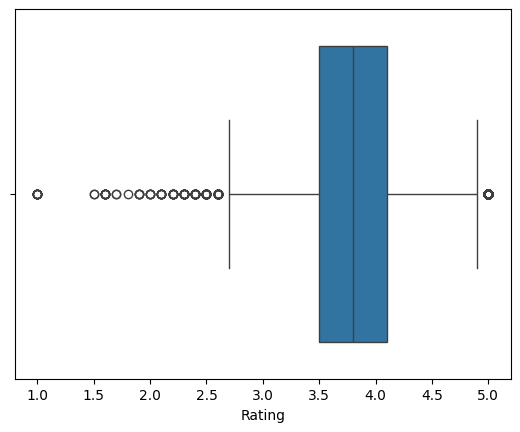

In [ ]:
sns.boxplot(df, x = "Rating")

<Axes: xlabel='Rating', ylabel='Average_salary'>

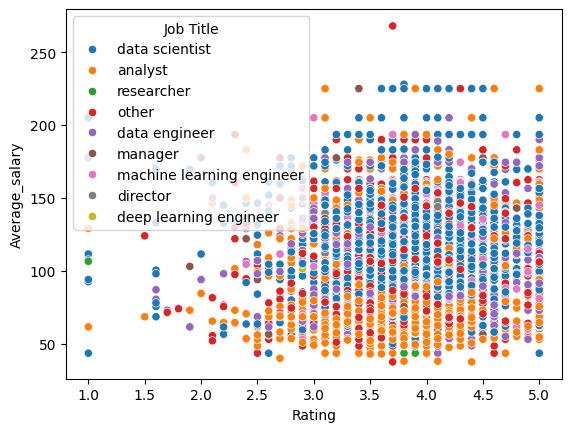

In [ ]:
sns.scatterplot(x='Rating', y='Average_salary', data= df, hue= "Job Title")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4891 non-null   object 
 1   Rating          4891 non-null   float64
 2   Average_salary  4891 non-null   float64
 3   state           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


# Feature Engineering

In [ ]:
df = pd.get_dummies(df, columns=["Job Title","state" ],dtype=int)

In [ ]:
df

,Rating,Average_salary,Job Title_analyst,Job Title_data engineer,Job Title_data scientist,Job Title_deep learning engineer,Job Title_director,Job Title_machine learning engineer,Job Title_manager,Job Title_other,...,state_NC,state_NH,state_NJ,state_NM,state_NY,state_OH,state_PA,state_TX,state_VA,state_WI
0,3.5,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,4.5,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3.4,146.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3.4,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,2.9,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,3.2,51.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5882,4.2,68.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5883,4.0,89.5,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5886,4.0,89.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4891 entries, 0 to 5887
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Rating                               4891 non-null   float64
 1   Average_salary                       4891 non-null   float64
 2   Job Title_analyst                    4891 non-null   int64  
 3   Job Title_data engineer              4891 non-null   int64  
 4   Job Title_data scientist             4891 non-null   int64  
 5   Job Title_deep learning engineer     4891 non-null   int64  
 6   Job Title_director                   4891 non-null   int64  
 7   Job Title_machine learning engineer  4891 non-null   int64  
 8   Job Title_manager                    4891 non-null   int64  
 9   Job Title_other                      4891 non-null   int64  
 10  Job Title_researcher                 4891 non-null   int64  
 11  state_AZ                           

In [ ]:
df.to_csv("preprocessed_salary_df.csv", index = False)

# Modeling

In [ ]:
x = df.drop(columns = "Average_salary")
y = df["Average_salary"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state = 101)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(x_train, y_train)

In [ ]:
x_train

,Rating,Job Title_analyst,Job Title_data engineer,Job Title_data scientist,Job Title_deep learning engineer,Job Title_director,Job Title_machine learning engineer,Job Title_manager,Job Title_other,Job Title_researcher,...,state_NC,state_NH,state_NJ,state_NM,state_NY,state_OH,state_PA,state_TX,state_VA,state_WI
5246,3.7,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1013,3.4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
162,1.9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2773,4.1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3233,3.5,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,3.8,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4876,4.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
693,4.1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1552,3.7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(lr.intercept_)

-116865316568596.19


In [ ]:
print(lr.coef_)

[ 1.85458939e+00  1.41057355e+14  1.41057355e+14  1.41057355e+14
  1.41057355e+14  1.41057355e+14  1.41057355e+14  1.41057355e+14
  1.41057355e+14  1.41057355e+14 -2.41920383e+13 -2.41920383e+13
 -2.41920383e+13 -2.41920383e+13 -2.41920383e+13 -2.41920383e+13
 -2.41920383e+13 -2.41920383e+13 -2.41920383e+13 -2.41920383e+13
 -2.41920383e+13 -2.41920383e+13 -2.41920383e+13 -2.41920383e+13
 -2.41920383e+13 -2.41920383e+13 -2.41920383e+13 -2.41920383e+13
 -2.41920383e+13 -2.41920383e+13 -2.41920383e+13 -2.41920383e+13
 -2.41920383e+13]


In [ ]:
prediction = lr.predict(x_test)

In [ ]:
prediction

array([ 92.921875, 124.140625,  91.171875,  74.953125,  99.6875  ,
       122.015625,  91.171875,  84.15625 , 106.578125, 129.796875,
        77.5625  , 139.265625,  97.640625,  87.625   ,  97.640625,
        97.296875,  97.0625  , 136.828125,  94.09375 , 109.1875  ,
       139.078125,  87.25    , 122.765625, 121.828125,  88.953125,
        75.28125 ,  93.640625, 107.4375  ,  90.75    , 125.984375,
        96.34375 , 121.671875,  88.015625,  98.203125,  85.4375  ,
       123.578125,  98.953125, 112.28125 ,  90.234375, 114.015625,
       123.359375, 122.015625, 106.203125,  88.71875 ,  78.03125 ,
       125.4375  ,  94.5625  , 125.25    , 100.03125 , 116.1875  ,
       149.625   , 103.1875  , 137.578125,  88.34375 , 106.765625,
        89.703125, 138.359375,  99.328125,  97.28125 , 106.53125 ,
       129.609375, 137.859375,  90.234375, 121.109375,  98.34375 ,
        76.234375,  79.96875 , 113.296875, 116.5625  ,  75.859375,
        74.015625,  93.640625,  80.75    ,  98.5625  , 125.625

In [ ]:
residual = prediction - y_test

In [ ]:
residual

,Average_salary
4607,10.921875
3136,-32.359375
2694,20.671875
4633,9.453125
4490,-27.312500
...,...
1075,-39.046875
460,-46.390625
1134,33.953125
4759,10.578125


<ipython-input-50-fbde9b034c46>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,bins=50)


<Axes: xlabel='Average_salary', ylabel='Density'>

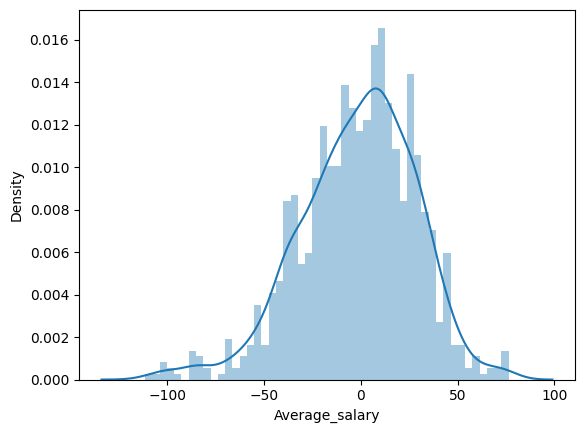

In [ ]:
sns.distplot(residual,bins=50)

In [ ]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, prediction))

MAE: 23.453093079673135


# Save the Model

In [ ]:
import pickle
pickle.dump(lr, open("Salary_Estimater.pkl", "wb"))